# <span style="color: #7574A7">Credit card fraud detection from scratch</span>
### <span style="color: #7574A7">using <a href=https://www.coursera.org/learn/machine-learning>Machine Learning</a> course materials and <a href=https://towardsdatascience.com/a-complete-anomaly-detection-algorithm-from-scratch-in-python-step-by-step-guide-e1daf870336e>this article</a></span>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import multivariate_normal

%matplotlib inline

## <span style="color: #7574A7">0. Dataset <a href=https://www.kaggle.com/mlg-ulb/creditcardfraud>(source)</a></span>

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Dataset imbalance ad oculus
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f} % of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17 % of total)



The dataset classes are highly imbalanced. So I'm going to try pretty straightforward approach: anomaly detection via multivariative normal distribution.

## <span style="color: #7574A7">1. Features, labels and metrics</span>

In [7]:
# Labels are in the 'Class' column
y = df.Class  

In [8]:
# Drop 'Time' (because its meaning is ambiguous) and 'Class' (labels column) columns from the features
X = df.drop(['Time', 'Class'], axis=1)  

In [9]:
# Normilize 'Amount' column (other columns are more or less normilized)
amount_max = X['Amount'].abs().max()
X['Amount'] = X['Amount'] / amount_max

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


In [11]:
# Split the data into train, validation and test sets (positive class is evenly spread between sets)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=13, stratify=y_tr)

In [12]:
y_val.describe()

count    45569.000000
mean         0.001734
std          0.041601
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

The 'mean' value shows that the positive class labels percentage is the same as in entire dataset (0.17 %).

In [13]:
# Confusion matrix plot function
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='PuBu')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    print('Recall: ',  round(cm[1][1] / np.sum(cm[1]), 3))

I'm going to use confusion matrix and recall as main metrics. The goal of the problem at hand is to detect as many fradulent transactions as possible even if some legitimate transactions would be incorrectly detected (so the number of false positives can be pretty high).

## <span style="color: #7574A7">2. Anomalies detection algorithm</span>

At first it is nessesary to find mean value for every feature and features covariance matrix so the probability density function (pdf) can be calculated for every transaction. These calculations are carried out on a training set. Current phase gives us the shape of multivariative normal distribution based on a traning set.

In [14]:
m = len(X_train)
s = np.sum(X_train, axis=0)
mu = s / m
cov = np.cov(X_train, rowvar=False)
p = multivariate_normal.pdf(X_train, mean=mu, cov=cov)

In [15]:
pd.Series(p).describe()  # the probability density function values stats for a training set

count    1.822760e+05
mean     6.810032e-11
std      1.526406e-10
min      0.000000e+00
25%      3.977537e-14
50%      2.918567e-12
75%      5.017588e-11
max      1.967362e-09
dtype: float64

## <span style="color: #7574A7">3. Finding threshold probability</span>

To be able to detect fradulent transactions we have to outline the threshold probability value epsilon. If some transactions pdf is lower than epsilon, it is likely that the transaction is fradulent. To do so we should calculate algorithms recall for a set of epsilon values that are lower than some cut-off limit (in this notebook I'm going to use the value of epsilon for 0.1 pdf quantile). Our goal is to find the value of epsilon with the highest recall. Threshold probability value is calculated using validation set. 

In [16]:
p_val = multivariate_normal.pdf(X_val, mean=mu, cov=cov)  # pdf for validation set

In [17]:
eps = [i for i in p_val if i <= pd.Series(p_val).quantile(q=0.10)]

In [18]:
rec_list = []
for e in eps:
    labels = [1 if i < e else 0 for i in p_val]  # translates pdf into labels
    tn, fp, fn, tp = confusion_matrix(y_val, labels).ravel()
    rec = tp / (tp + fn)
    rec_list.append(rec)

In [19]:
round(max(rec_list), 3)  # the highest recall for validation set

0.949

In [20]:
eps_tr = eps[np.array(rec_list).argmax()]  # threshold probability
eps_tr

4.892002897804086e-17

## <span style="color: #7574A7">4. Metrics on test set</span>

Let's evaluate algorithm on a test set.

In [21]:
p_test = multivariate_normal.pdf(X_test, mean=mu, cov=cov)

In [22]:
labels = [1 if i < eps_tr else 0 for i in p_test]

Legitimate Transactions Detected (True Negatives):  51331
Legitimate Transactions Incorrectly Detected (False Positives):  5533
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  82
Total Fraudulent Transactions:  98
Recall:  0.837


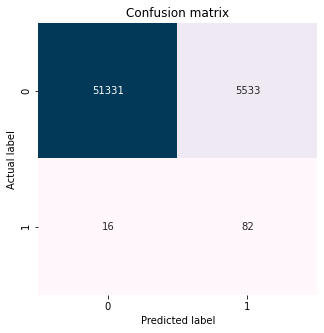

In [23]:
plot_cm(y_test, labels)

Not so bad for the first cut.